# CFD Results Post-Process & Validation

**The final step for the development of a CFD simulation for a problem of interest is to process and examine the validity of the obtained numerical results (a.k.a post-processing and validation step). This steps requires an in-depth engineering knowledge about the fundamentals of the physical problem of interest. Thus, the value of investing time in understanding the fundamental physics of the flow, once again is highlighted here. This process is done starting from general inspection on CFD simulation results and ends with more detail validation process.**

The obtained numerical results for 2D laminar flow in a channel with backward facing step in OpenFoam is post processed and discussed in this section. The presented results are for the flow with Reynolds number of 100. The presented post-processing step is a general methodology and can be used for flow with other Reynolds number as well. The first general rule of thumb to check the convergence of a CFD simulation is to check the residual and error values for key flow field variables, such as continuity, velocity and pressure. In Open Foam the residual values for velocity components and pressure along with error values for continuity are printed out at each time step as set in the `controlDict` dictionary file. A sample of time report is shown below for the last time step `t=500`:

```C++
Time = 500

smoothSolver:  Solving for Ux, Initial residual = 8.79629e-09, Final residual = 7.37956e-10, No Iterations 2
smoothSolver:  Solving for Uy, Initial residual = 9.16532e-09, Final residual = 7.70238e-10, No Iterations 2
GAMG:  Solving for p, Initial residual = 7.24273e-09, Final residual = 7.05583e-10, No Iterations 24
time step continuity errors : sum local = 1.75353e-12, global = -1.6723e-13, cumulative = -0.000386904
ExecutionTime = 4714.73 s  ClockTime = 5359 s
```

The residual value of each variable denotes how the the numerical value of that variable is differing from the previous time step. Lower value of residual indicates the obtained numerical value of the variable of interest has converged to a specific value. In this simulation this is true for `U_x`, `U_y` and `p` that have residual values by order of `1e-9`. The reported `continuity errors` defines how the obtained relevant variables are satisfying the continuity equation. The global continuity error with order of `1e-13` in this problem confirms that continuity equation is being satisfied.

Once the simulation is ran in OpenFoam the user can make and plot the evolution trend for different variables at the end of the simulations. Running the command `foamJob simpleFoam` when starting the iterations will store the residual values on the RAM. In the end of simulation, running the command `foamLog log` inside the main working directory will make log files for different flow field variables inside a new directory called `logs`. Changing the directory into `logs` and running `gnuplot` command, user can plot the obtained numerical residuals. This process was done for simulation with Re=100 and generated log files were visualized using the following commands:

```C++
gnuplot
gnuplot> set xlabel "Iterations"          #sets label of x-axis
gnuplot> set ylabel "Residuals"           #sets label of y-axis
gnuplot> set logscale y                   #sets logarithmic scale of y axis
gnuplot> plot './contLocal_0' with lines, './UxFinalRes_0' with lines, './pFinalRes_0' with lines #plots residuals
```   

<img src="./Images/residuals_Re100.png" width="1000" align="middle">
</br>
Fig. 1 The residual values of `U_x` and `p` with the continuity error values versus time steps.

The general decreasing trend of the residual and error values confirm that the numerical solution of the conservation/governing equations are converging to specific final values. This decreasing trend is the first necessary, but not sufficient, general criteria to confirm the convergence of the CFD simulation.

The second step is to visualize dimensionless form of the important flow field variables within the CFD domain. This visualization step can be problem specific and should be performed over an adequate plane of choice. In OpenFoam the post-processing is recommended to be done in ParaView, which is the recommended post-processor package of OpenFoam. Running the command:

```C++
paraFoam
```

in the terminal, while locating in the working directory of the simulation will simply read all the obtained numerical results and get it ready for post-processing. Once the user ran `paraFoam` command and the software load up, hitting the `Apply` bottom under `properties` window will load the numerical results.

For most of the problems contour of normalized velocity or pressure, over a horizontal or vertical plane at the center of the CFD domain, is a good start point. For the current problem, since the entire domain is two dimensional and planar, it would make the entire domain the best candidate for the post-processing plane. User should now define the normalized variable of interest that needs to be visualized. Defining variables can be done via `Filters/Data Analysis/Calculator`. This command will open a new panel under propertise, where users can define their variable of interest. Name the variable (i.e. `Ux/U0`) and enter the required formula for the normalized variable of interest (i.e. `U_x/0.173`) and hit `Apply`. This will calculate the normalized streamwise velocity with free stream velocity ($0.173 \frac{m}{s}$) within entire CFD domain for all the time steps and visualize the results for `t=0`. Using the `play` bottom users can see flow evolution along the channel and formation of the recirculation region right after the backward facing step, from `t=0` to `t=500` across the domain:

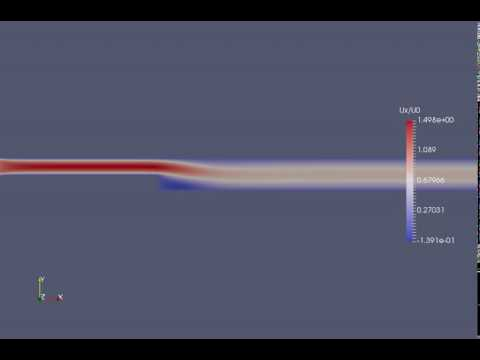

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("5Z2ssX0REDs")

Fig. 2 - Animation for temporal evolution of normalized streamwise velocity contours with the free stream velocity for flow in a channel with a backward facing step (Re=100).

Fig. 2 visualizes animation of the normalized streamwise velocity with free stream for the flow over backward step with Reynolds number of 100. The physics of the first part of this flow, within the upper section of the domain, is identical to the flow inside a 2D pipe; flow enters the domain with normalized velocity of one and right away due to the imposed no-slip wall boundary conditions on the top and bottom of channel's entrance, flow decelerates significantly.. An entrance region forms and then the flow field becomes fully developed. The interesting phenomena happens, when the flow passes over the backward facing step. A recirculation region, region of very low velocity, colored in dark blue color with a specific length forms right after that step. After this specific length flow re-attaches to the bottom wall of the channel. Due to the sudden cross-section expansion and law of mass conservation the mean velocity of the flow decreases and flow moves toward the outlet of the domain. Flow field's physics in this section is again identical to the flow in a 2D pipe. In the end it should also be highlighted that the visualized velocity contours within the CFD domain are smooth. The smoothness confirms the validity of created mesh resolution and convergence of the numerical solution. However, this is only an additional necessary, but not sufficient criteria for simulation validity and convergence.

Increasing the value of Reynolds number within the flow would increase the effect of inertial forces compared to the viscous forces within the domain. Therefore, the length of the recirculation region as well as number of them will increase. Fig. 3 visualizes animation of the normalized streamwise velocity contours with the free stream velocity for case study with Reynolds number of 800. The increase of the separation region length and formation of a separation region on the top of the channel is easy to notice compare to the presented results in Fig. 2. It also important to notice that increasing the flow field Reynolds number would make the flow three dimensional. As a result of this 2D simulations would be limited in accuracy to capture the physics of this flow field (see the discussion in the validation section).

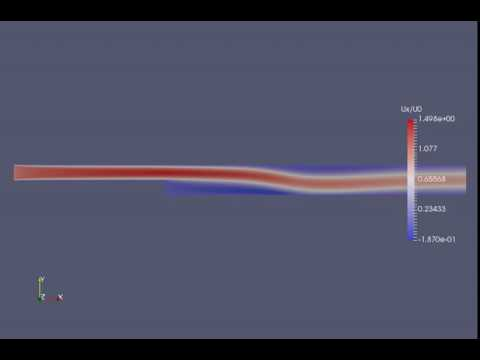

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("PWFt-cCa1AE")

Fig. 3 - Animation for temporal evolution of normalized streamwise velocity contours with the free stream velocity for flow in a channel with a backward facing step with Reynolds numbers of 800.

As discussed earlier in the Physics section the length of the recirculation region after the backward facing step can be evaluated by tracking the sign variation of the shear stress ($\tau_{xy}$) values on the bottom wall of the channel. According to the presented mathematical proof in the Physics section, the shear stress $\tau_{xy}$ will be negative right after the backward step, within the recirculation region, since the flow changes it's directionality in this region. Further downstream at the point of flow re-attachment, as the flow changes it's direction to the streamwise direction again, the shear stress will become positive. Users can take advantage of this phenomena and investigate the variation of streamwise velocity gradient ($\frac{dU}{dy}$) signage along the bottom wall to numerically evaluate the length of the separation region. In order to validate the CFD simulations these evaluated lengths will be compared against the corresponding experimental values published by [Armaly et. al.](http://journals.cambridge.org/action/displayAbstract?fromPage=online&aid=380534&fileId=S0022112083002839).

The streamwise velocity gradient ($\frac{dU}{dy}$) along the walls of the CFD domain can be extracted using the command <span style=style="background-color:lightgrey;">wallGradU</span> in Open Foam. Running this command in terminal after the simulation is done, will calculate the flow velocity gradient along all wall boundaries in three directions (i.e. $\frac{dU_x}{dy}, \frac{dU_y}{dy}, \frac{dU_z}{dy}$). These exported data can be read and visualized in ParaView (To smoothen these data importing process it is recommended to run the <span style=style="background-color:lightgrey;">wallGradU</span> command before reading the simulation data in ParaView). Once the velocity gradient data is imported into ParaView users can visualized the streawise velocity gradient, named wallGradU_x in ParaView, for each time step along the lower wall of the CFD domain called `bottom_wall_outlet`. Fig. 4 visualizes $\frac{dU}{dy}$ along this boundary for time step of 500 as follow:

<img src="./Images/shear_Re100.png" width="500" align="middle">
</br>
Fig. 4 -  The streamwise velocity gradient ($\frac{dU}{dy}$) along the bottom wall of the channel for the flow in a channel with backward facing step with Reynolds of 100.

Fig. 4 shows that the streamwise velocity gradient ($\frac{dU}{dy}$) right after the step has negative value, since the flow has changes it's directionality close to the wall boundary. This negative value increases to the middle of the recirculation zone, where can be thought as the heart of the recirculation region. Then the  streamwise velocity gradient value start to decrease back to zero. Once the flow becomes fully uniform within the channel cross section and flow re-attaches to bottom of the channel the streamwise velocity gradient value becomes positive and start increasing with positive value. For a fully developed flow, moving toward toward the outlet of the domain, the value of  streamwise velocity gradient (i.e. shear stress) becomes constant as visualized in Fig. 4. This graph confirms that the flow reattaches to the channels wall, sign of the shear stress changes, at about $x=0.064~[m]$ from the inlet of the channel. This data can be obtained by simply hovering the mouse pointer on top of the cross signs on the plot and read corresponding coordinates to them. To calculate the length of the separation region, as measured and reported on figure 14 on page 490 in the work of [Armaly et. al.](http://journals.cambridge.org/action/displayAbstract?fromPage=online&aid=380534&fileId=S0022112083002839), the initial $0.05~[m]$ length of the channel should be subtracted from this value, which corresponds to a separation length of about $0.015 [m]$. Table 1 shows the evaluated separation length and it's comparison with the corresponding normalized separation length value with the initial height of the backward facing step ($s=0.0049 [m]$):

| Reynolds #     |$x_L~[m]$ Numerical|$x_3~[m]$ Numerical|$x_3/s$ Numerical  | $x_3/s$ Experiment|Relative Error [%]|
| :-------------:|:---------------:  |:---------------:  |:--------------:   | :----------------:|:----------------:|
| 100            | 0.064             |0.014              | 2.857             | 3.027             |5.61              |
Table 1. Comparison between the experimentally measured and numerically predicted normalize separation region length for flow over a backward step with Re=100.

As shown in the Table 1, the CFD simulation can evaluate the experimentally measured recirculation length with about $5\%$ level of accuracy. This is a good validation point for the developed CFD simulations. At this point user can be confident in the validity of the developed CFD mesh and simulation and use it for simulation of other case studies. Using this validate developed base simulation, the flow in a channel with a backward facing step with various Reynolds numbers (up to 800) was ran and the numerically evaluated separation length were compared against the corresponding experimentally measured separation length reported by [Armaly et. al.](http://journals.cambridge.org/action/displayAbstract?fromPage=online&aid=380534&fileId=S0022112083002839). Fig 5. visualizes these comparisons.

<img src="./Images/x3_various_Re.png" width="500" align="middle">
</br>
Fig. 5 Comparison between the experimentally measured and numerically predicted normalize separation region length for flow over a backward step with various Reynolds numbers.

It is interesting to note that the agreement between numerical and experimental data is very good for flows with Reynolds number less than 400. However, after this Reynolds number the CFD simulation under estimates the length of the recirculation zone compared to the experiment. This deviation of numerical results from corresponding experimental results is similar to the reported trend by [Armaly et. al.](http://journals.cambridge.org/action/displayAbstract?fromPage=online&aid=380534&fileId=S0022112083002839). According to Armaly et. al.: "[Using CFD simulations] converged and grid-independent solutions could be obtained that are in good agreement with experimental findings up to a Reynolds number Re~400. For Reynolds numbers in excess of this value the numerical results also show multiple regions of  separated (recirculating) flow at the wall  opposite to the two-dimensional step and on the channel side where the step is located. Unfortunately with the occurrence of more than one separated flow region, the flow in the experiments becomes three-dimensional in the region downstream of the step, and this prevents direct comparison between the experimental and theoretical results."

Comparing the obtained data from Open Foam to the corresponding data from FLUENT, one can see that Open Foam with `simpleFoam` solver underestimates the length of recirculation area compared to the `laminar` solver of FLUENT. Fig. 6 visualizes the numerical data from Open Foam and FLUENT against the experimental data of [Armaly et. al.](http://journals.cambridge.org/action/displayAbstract?fromPage=online&aid=380534&fileId=S0022112083002839). This underestimation become more noticeable at higher Reynolds numbers (Re > 400), when the three dimensionality of the flow field increases and numerical model become limited in capturing the physics of the flow field. Further investigations shows that using the `icoFoam` solver, which is a recommended solver for laminar transient flows, instead of the `simpleFoam` solver would increase the level of accuracy of the obtained numerical results from Open Foam and match the numerical results from FLUENT. However, this change of solver would significantly increase the computational time and cost.

<img src="./Images/x3_various_Re_vs_Fluent.png" width="500" align="middle">
</br>
Fig. 5 Comparison between the experimentally measured (blue) and numerically predicted, obtained from FLUENT (orange), Open Foam [simpleFoam (gray) and icoFoam (yellow)], normalize separation region length for flow over a backward step with various Reynolds numbers.

At this stage one can conclude that this CFD numerical simulation is validated to study steady laminar flow over a backward facing step. Therefore, these simulations can be used for similar or more complex problems, such as unsteady flow over a backward facing step or three dimensional laminar steady or unsteady flow over backward facing step. This can be done via correct implementation in changing the corresponding solver, models and/or boundary conditions.

> For more details on the physics, theory and equation derivation please see work of Armaly et. al. "Experimental and theoretical investigation of backward-facing step flow
" [here](http://journals.cambridge.org/action/displayAbstract?fromPage=online&aid=380534&fileId=S0022112083002839).